In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import ResNet50


In [45]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [46]:
Y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [86]:
#model : CNN
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
model1.fit(x_train,Y_train_new,epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8560 - loss: 2.5422 - val_accuracy: 0.9682 - val_loss: 0.1214
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9736 - loss: 0.0917 - val_accuracy: 0.9735 - val_loss: 0.1005
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9825 - loss: 0.0553 - val_accuracy: 0.9720 - val_loss: 0.0960
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9877 - loss: 0.0379 - val_accuracy: 0.9797 - val_loss: 0.0815
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accuracy: 0.9813 - val_loss: 0.0707


In [89]:
y_pred = (model1.predict(x_test).argmax(axis=1))
y_pred1 = np.mean(y_pred==y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [51]:
print("Accuracy test \n" ,y_pred1*100,"%")

Accuracy test 
 93.57 %


In [52]:
print("Accuracy test \n" ,model1.evaluate(x_test,y_test_new)[1]*100,"%")
print("loss percentage test \n" ,model1.evaluate(x_test,y_test_new)[0]*100,"%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9294 - loss: 0.2916
Accuracy test 
 93.5699999332428 %
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9294 - loss: 0.2916
loss percentage test 
 25.852853059768677 %


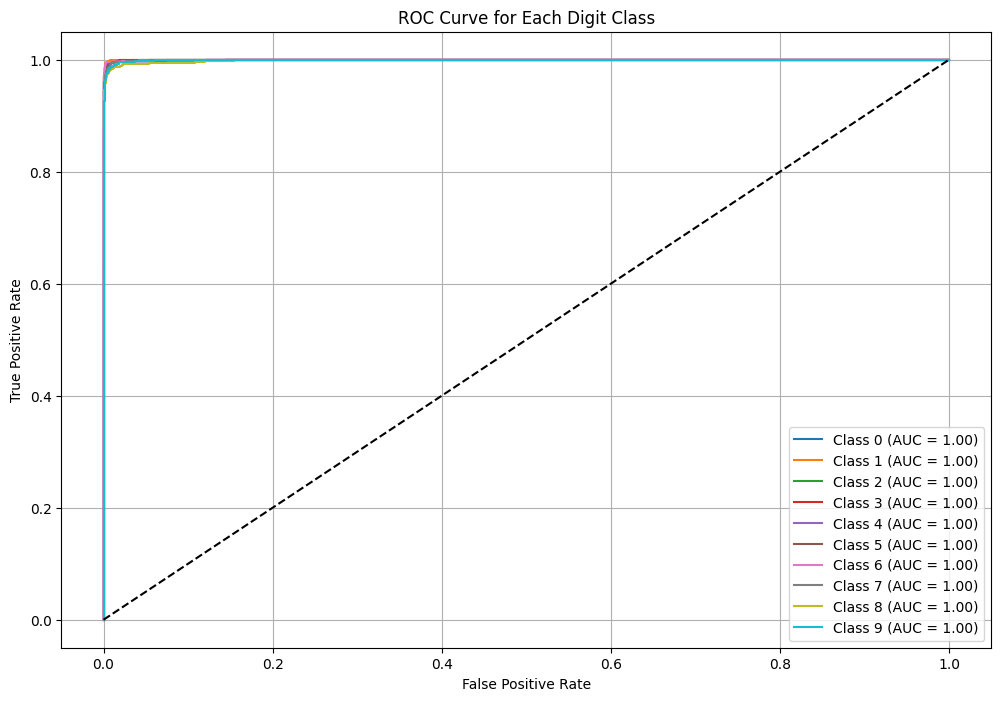

In [53]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Digit Class')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
print("classification report \n" ,classification_report(y_test,y_pred))

classification report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.94      0.96      1135
           2       0.92      0.93      0.93      1032
           3       0.90      0.94      0.92      1010
           4       0.97      0.90      0.93       982
           5       0.96      0.91      0.93       892
           6       0.95      0.97      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.83      0.95      0.88       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [55]:
cm = confusion_matrix(y_test,y_pred)

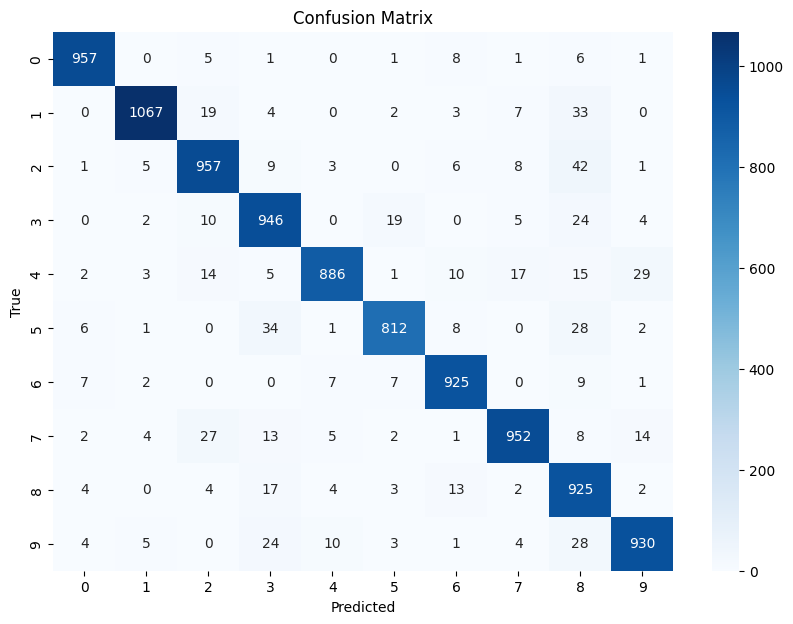

In [56]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


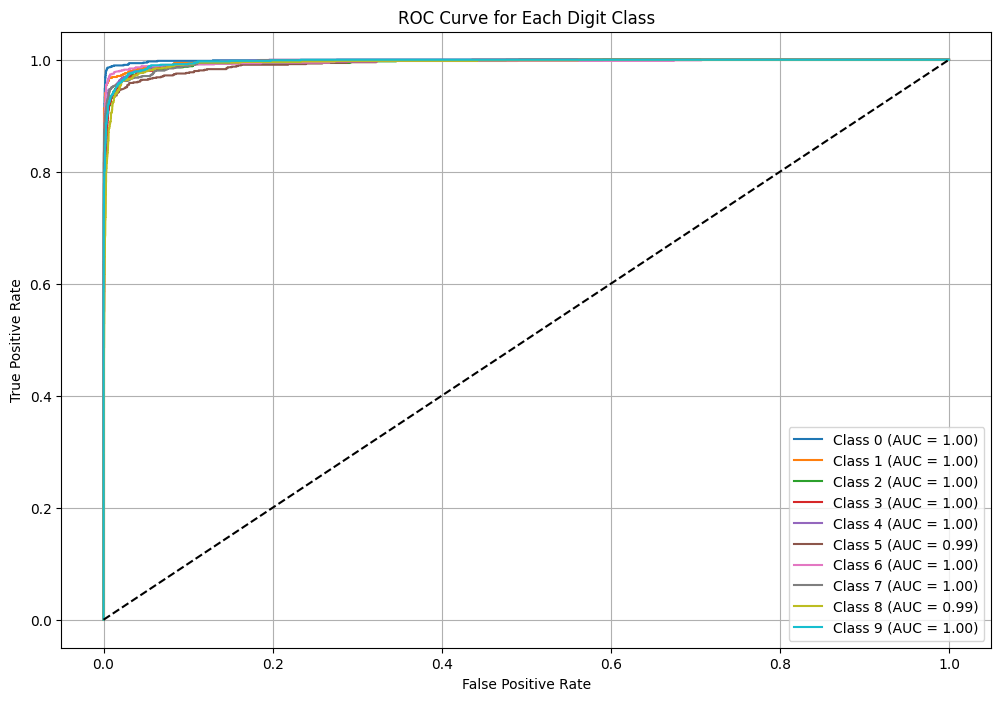

In [57]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_pred_prob = model1.predict(x_test)
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Digit Class')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


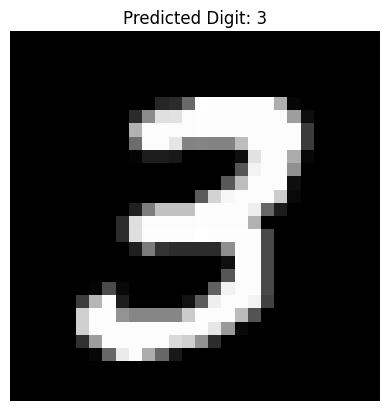

Predicted Digit: 3


In [90]:
def predict_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found.")
        return -1
    img = cv2.resize(img, (28, 28))
    if np.mean(img) > 127:
        img = 255 - img

    img = img / 255.0
    img = img.reshape(1, 28, 28)

    pred = model1.predict(img)
    digit = np.argmax(pred)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()
    return digit

predicted_digit = predict_digit("Dataset/MNIST_digit.png")

if predicted_digit != -1:
    print(f"Predicted Digit: {predicted_digit}")
else:
    print("Error: Could not predict the digit.")